In [80]:
import os
import xarray as xr
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import tensorly as tl

In [19]:
MVBS_PCP_path = '/Users/wu-jung/code_git/ooi_sonar/zplsc_data_2015fall/nc_PCP_envFromFile/'
MVBS_rpca_file = '20150817-20151017_MVBS_time_from_Sv_rangeBin5_rpca.nc'

In [20]:
MVBS_rpca = xr.open_dataset(os.path.join(MVBS_PCP_path, MVBS_rpca_file))
MVBS_rpca

<xarray.Dataset>
Dimensions:    (date: 62, depth: 37, frequency: 3, hour: 144)
Coordinates:
  * date       (date) datetime64[ns] 2015-08-17 2015-08-18 ... 2015-10-17
  * frequency  (frequency) int64 38000 120000 200000
  * depth      (depth) float64 184.0 179.0 174.0 169.0 ... 14.91 9.943 4.972
  * hour       (hour) float64 0.0 0.1667 0.3333 0.5 ... 23.33 23.5 23.67 23.83
Data variables:
    low_rank   (date, frequency, depth, hour) float64 ...
    sparse     (date, frequency, depth, hour) float64 ...

In [22]:
low_rank = MVBS_rpca['low_rank']
low_rank.shape

(62, 3, 37, 144)

In [24]:
low_rank = low_rank.values.reshape([62,-1])
low_rank.shape

(62, 15984)

In [27]:
low_rank_nonneg = low_rank - low_rank.min()

In [70]:
model = NMF(n_components=3, init='random', random_state=0)

In [74]:
H = model.fit_transform(low_rank_nonneg)
W = model.components_

In [75]:
(W.shape, H.shape)

((3, 15984), (62, 3))

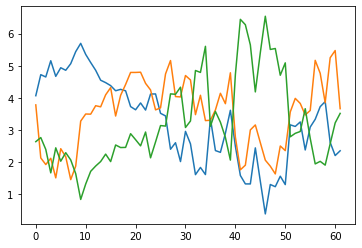

In [76]:
hlines = plt.plot(H)

In [78]:
W_reorg = W.reshape(3,3,37,144)

In [87]:
tl.unfold(tl.tensor(W_reorg[icomp,:,:,:].squeeze()),mode=2).shape

(144, 111)

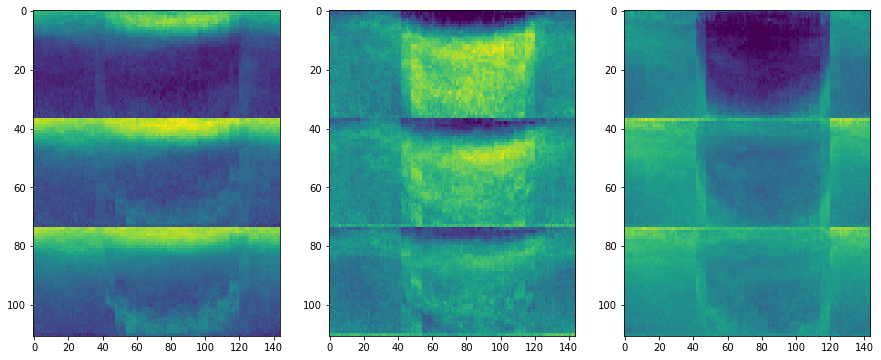

In [90]:
fig, ax = plt.subplots(1,3,figsize=(15,6))
for icomp in range(3):
    ax[icomp].imshow(tl.unfold(tl.tensor(W_reorg[icomp,:,:,:].squeeze()),mode=2).T,
                     aspect='auto')